In [2]:
%matplotlib inline


In [20]:
# Practica 1 - Part 1 - Imatge hibrida en el domini del espai

# Importem les llibreries necessaries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image

# Funcio que et troba la gaussiana, segons un nombre sigma
def gaussian(sigma):
    masksize=6*sigma+1 
    Igaussian=[[masksize]*masksize for x in range(masksize)]
    x0=float(masksize)/2.0
    y0=float(masksize)/2.0
    for x in range (0, masksize):
        for y in range (0, masksize):
            # Apliquem la formula de la gaussiana pas per pas
            esquer=(((x-x0)**2)/(2*(sigma**2)))
            dret=(((y-y0)**2)/(2*(sigma**2)))
            suma=esquer+dret
            Igaussian[x][y]=math.exp(-suma)

    A=1/np.sum(Igaussian)
    print (A)
    for x in range (0, masksize):
        for y in range (0, masksize):
            Igaussian[x][y]=A*Igaussian[x][y]
            
    # Mostrem la gaussiana que anem a utilitzar
    #plt.subplot(1,6,1)
    #plt.imshow(Igaussian)
    return Igaussian

    
   

0.00197382668079


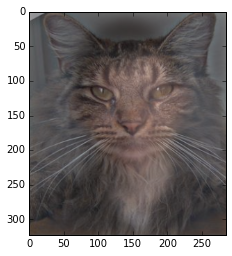

In [10]:
# Importem les llibreries necessaries
from scipy import signal
from skimage.transform import resize

# funcio que fa una iamtge hibrida segons el filtre pasa baix d'una imatge i el filtre pasa alt de l'altre imatge
def obrirImatge():
    # Passem a float
    imatgeHuman=misc.imread("human.png")/255.
    imatgeCat=misc.imread("cat.png")/255.
    
    # Escalo les imatges perque siguin del mateix tamany, el problema es que no coincideixen
    imatgeGatRe=resize(imatgeCat,(323,285), order=1, preserve_range=True)
    
    # Executo la funcio que ens crea la gaussiana
    gauss=gaussian(9)
    
    # Creem les matrius per fer el filtre amb zeros
    fitrPasaBaixHuman = np.zeros((323,285,3))
    fitrPasaAltHuman = np.zeros((323,285,3))
    fitrPasaBaixGat = np.zeros((323,285,3))
    fitrPasaAltGat = np.zeros((323,285,3))
    
    # Convoluciono les imatges per treure el pasa Baix
    fitrPasaBaixHuman[:,:,0]=signal.convolve2d(imatgeHuman[:,:,0],gauss,mode='same')
    fitrPasaBaixHuman[:,:,1]=signal.convolve2d(imatgeHuman[:,:,1],gauss,mode='same')
    fitrPasaBaixHuman[:,:,2]=signal.convolve2d(imatgeHuman[:,:,2],gauss,mode='same')
    
    fitrPasaBaixGat[:,:,0]=signal.convolve2d(imatgeGatRe[:,:,0],gauss, mode='same')
    fitrPasaBaixGat[:,:,1]=signal.convolve2d(imatgeGatRe[:,:,1],gauss, mode='same')
    fitrPasaBaixGat[:,:,2]=signal.convolve2d(imatgeGatRe[:,:,2],gauss, mode='same')
    
    # Mostrem les imatges
    #plt.figure()
    #plt.imshow(imatgeHuman)
    #plt.figure()
    #plt.imshow(fitrPasaBaixHuman)
    #plt.figure()
    #plt.imshow(imatgeCat)
    #plt.figure()
    #plt.imshow(fitrPasaBaixGat)
    
    # Fem el passa Alt del gat, restant la imatge real menys el passa baix
    fitrPasaAltGat[:,:,0]=imatgeGatRe[:,:,0]-fitrPasaBaixGat[:,:,0]
    fitrPasaAltGat[:,:,1]=imatgeGatRe[:,:,1]-fitrPasaBaixGat[:,:,1]
    fitrPasaAltGat[:,:,2]=imatgeGatRe[:,:,2]-fitrPasaBaixGat[:,:,2]
    
    # restem el minim de cada canal y el dividim entre el maxim meny el minim pero normalitzar la imatge y que no surti saturada
    fitrPasaAltGat[:,:,0] = ((fitrPasaAltGat[:,:,0] - fitrPasaAltGat[:,:,0].min()) / (fitrPasaAltGat[:,:,0].max() - fitrPasaAltGat[:,:,0].min()))
    fitrPasaAltGat[:,:,1] = ((fitrPasaAltGat[:,:,1] - fitrPasaAltGat[:,:,1].min()) / (fitrPasaAltGat[:,:,1].max() - fitrPasaAltGat[:,:,1].min()))
    fitrPasaAltGat[:,:,2] = ((fitrPasaAltGat[:,:,2] - fitrPasaAltGat[:,:,2].min()) / (fitrPasaAltGat[:,:,2].max() - fitrPasaAltGat[:,:,2].min()))
    
    #fitrPasaAltGat = fitrPasaAltGat
    # plt.figure()
    #plt.imshow(fitrPasaAltGat)
    #plt.colorbar()
    
    # Mostrem les imatges, amb el tant per cent de cada una que volem
    imatgeFinal=fitrPasaBaixHuman*0.4+fitrPasaAltGat*0.6
    plt.figure()
    plt.imshow(imatgeFinal)

obrirImatge()

In [11]:
# Practica 1 - Part 2 - Imatge hibrida en el domini de la fequencia

0.00197382668079


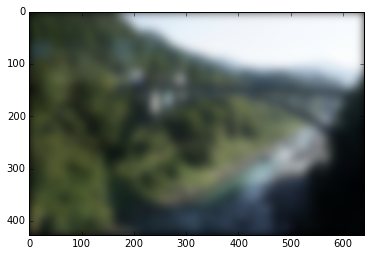

In [12]:
# funcio que envies una imatge i et retorna l'imatge filtrada amb un filtre pasa baix
def filtreLP(imagen):
    # Executo la funcio que ens crea la gaussiana
    gauss=gaussian(9)
    
    # Creem les matrius per fer el filtre amb zeros
    fitr = np.zeros((427,640,3))
    
    # Convoluciono les imatges per treure el pasa Baix
    fitr[:,:,0]=signal.convolve2d(imagen[:,:,0],gauss,mode='same')
    fitr[:,:,1]=signal.convolve2d(imagen[:,:,1],gauss,mode='same')
    fitr[:,:,2]=signal.convolve2d(imagen[:,:,2],gauss,mode='same')
    
    #plt.figure()
    #plt.imshow(fitr)
    
    return fitr

imatgeLP = misc.imread("paisaje.jpg")/255.
imatgePaisatgeLP = filtreLP(imatgeLP)
plt.figure()
plt.imshow(imatgePaisatgeLP)

0.00197382668079


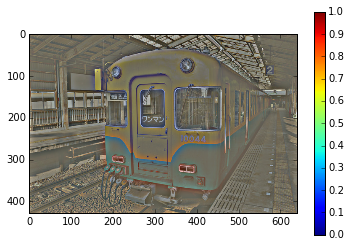

In [17]:
# funcio que envies una imatge i et retorna l'imatge filtrada amb un filtre passa alt
def filtreHP(imagen):    
    # Creem les matrius per fer el filtre amb zeros
    fitrHP = np.zeros((427,640,3))
    
    fitrLP = filtreLP(imagen)
    
    # Fem el passa Alt del gat, restant la imatge real menys el passa baix
    fitrHP[:,:,0]=imagen[:,:,0]-fitrLP[:,:,0]
    fitrHP[:,:,1]=imagen[:,:,1]-fitrLP[:,:,1]
    fitrHP[:,:,2]=imagen[:,:,2]-fitrLP[:,:,2]
    
    # restem el minim de cada canal y el dividim entre el maxim meny el minim pero normalitzar la imatge y que no surti saturada
    # Formalitzem la imatge entre 0.0 i 1.0
    fitrHP[:,:,0] = ((fitrHP[:,:,0] - fitrHP[:,:,0].min()) / (fitrHP[:,:,0].max() - fitrHP[:,:,0].min()))
    fitrHP[:,:,1] = ((fitrHP[:,:,1] - fitrHP[:,:,1].min()) / (fitrHP[:,:,1].max() - fitrHP[:,:,1].min()))
    fitrHP[:,:,2] = ((fitrHP[:,:,2] - fitrHP[:,:,2].min()) / (fitrHP[:,:,2].max() - fitrHP[:,:,2].min()))
    
    #plt.figure()
    #plt.imshow(fitrHP)
    
    return fitrHP

imatgeHP = misc.imread("tren.jpg")/255.
imatgeTrenHP = filtreHP(imatgeHP)
plt.figure()
plt.imshow(imatgeTrenHP)
plt.colorbar()

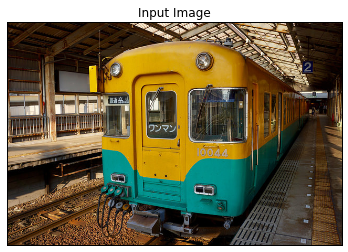

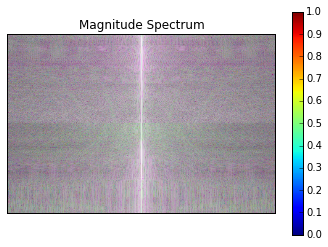

In [51]:
# Apliquem la transformada inversa de fourier
import numpy as np
from matplotlib import pyplot as plt

img = imatgeHP
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

magnitude_spectrum[:,:,0] = ((magnitude_spectrum[:,:,0] - magnitude_spectrum[:,:,0].min()) / (magnitude_spectrum[:,:,0].max() - magnitude_spectrum[:,:,0].min()))
magnitude_spectrum[:,:,1] = ((magnitude_spectrum[:,:,1] - magnitude_spectrum[:,:,1].min()) / (magnitude_spectrum[:,:,1].max() - magnitude_spectrum[:,:,1].min()))
magnitude_spectrum[:,:,2] = ((magnitude_spectrum[:,:,2] - magnitude_spectrum[:,:,2].min()) / (magnitude_spectrum[:,:,2].max() - magnitude_spectrum[:,:,2].min()))

plt.figure
plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.imshow(magnitude_spectrum)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()